# **Data Dictionary**

This dataset contains customer and address details for an insurance company. Below is the description of each field.

---

## **1. Address Information**
| Column Name     | Description  |
|----------------|-------------|
| **ADDRESS_ID** | Unique ID for a specific address |
| **LATITUDE** | Latitude of the address |
| **LONGITUDE** | Longitude of the address |
| **STREET_ADDRESS** | Mailing Address of the address |
| **CITY** | City |
| **STATE** | State |
| **COUNTY** | County |

---

## **2. Customer Information**
| Column Name     | Description  |
|----------------|-------------|
| **INDIVIDUAL_ID** | Unique ID for a specific insurance customer |
| **ADDRESS_ID** | Unique ID for the primary address associated with a customer |
| **CURR_ANN_AMT** | The annual dollar value paid by the customer in the previous year (not the policy amount) |
| **DAYS_TENURE** | The number of days the individual has been a customer with the insurance agency |
| **CUST_ORIG_DATE** | The date the individual became a customer |
| **AGE_IN_YEARS** | Age of the individual |
| **DATE_OF_BIRTH** | Individual's date of birth |
| **SOCIAL_SECURITY_NUMBER** | Social Security Number (middle two digits masked as `XX`) |
| **INCOME** | Estimated income for the household associated with the individual |

---

## **3. Household & Lifestyle Information**
| Column Name     | Description  |
|----------------|-------------|
| **HAS_CHILDREN** | Flag (`1` = Individual has children in the home, `0` = Otherwise) |
| **LENGTH_OF_RESIDENCE** | Estimated number of years the individual has lived in their current home |
| **MARITAL_STATUS** | Estimated marital status (`Married` or `Single`) |
| **HOME_MARKET_VALUE** | Estimated value of the home |
| **HOME_OWNER** | Flag (`1` = Individual owns their primary home, `0` = Otherwise) |
| **COLLEGE_DEGREE** | Flag (`1` = Individual has a college degree or more, `0` = Otherwise) |
| **GOOD_CREDIT** | Flag (`1` = Individual has a FICO score greater than 630, `0` = Otherwise) |

---

## **4. Account Status**
| Column Name     | Description  |
|----------------|-------------|
| **ACCT_SUSPD_DATE** | Date of account suspension or cancellation |

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import statsmodels.stats.stattools as st
import statsmodels.stats.api as sms
import statsmodels.discrete.discrete_model as sml

In [2]:
df = pd.read_csv(r"Dataset\Auto_churn\autoinsurance_churn.csv")
df.head()

,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,latitude,longitude,city,...,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,acct_suspd_date,Churn
0,2.213000e+11,5.213000e+11,818.877997,1454.0,2018-12-09,44,1978-06-23,32.578829,-96.305006,Kaufman,...,22500.0,1.0,15.0,Married,50000 - 74999,1.0,1.0,1.0,NaN,0
1,2.213001e+11,5.213001e+11,974.199182,1795.0,2018-01-02,72,1950-05-30,32.732209,-97.000893,Grand Prairie,...,27500.0,0.0,2.0,Single,50000 - 74999,1.0,0.0,0.0,NaN,0
2,2.213007e+11,5.213002e+11,967.375112,4818.0,2009-09-23,55,1967-07-07,32.819777,-96.846938,Dallas,...,42500.0,0.0,10.0,Married,75000 - 99999,1.0,0.0,0.0,NaN,0
3,2.213016e+11,5.213006e+11,992.409561,130.0,2022-07-25,53,1969-05-25,32.684065,-97.162180,Arlington,...,125000.0,1.0,6.0,Married,175000 - 199999,1.0,0.0,1.0,2021-12-22,1
4,2.213016e+11,5.213006e+11,784.633494,5896.0,2006-10-11,50,1972-09-25,32.751398,-97.376745,Fort Worth,...,87500.0,1.0,4.0,Married,225000 - 249999,1.0,1.0,1.0,NaN,0


In [3]:
df.describe()

,individual_id,address_id,curr_ann_amt,days_tenure,age_in_years,latitude,longitude,income,has_children,length_of_residence,home_owner,college_degree,good_credit,Churn
count,1.680909e+06,1.680909e+06,1.680909e+06,1.680909e+06,1.680909e+06,1.427190e+06,1.427190e+06,1.680909e+06,1.680909e+06,1.680909e+06,1.680909e+06,1.680909e+06,1.680909e+06,1.680909e+06
mean,2.213018e+11,5.213007e+11,9.403140e+02,3.602007e+03,5.581648e+01,3.285130e+01,-9.694764e+01,8.149773e+04,5.221336e-01,7.501612e+00,8.201003e-01,3.515033e-01,8.411937e-01,1.150901e-01
std,9.926327e+05,4.174711e+05,2.465392e+02,2.341005e+03,1.455192e+01,1.944458e-01,2.963725e-01,5.438100e+04,4.995100e-01,5.135309e+00,3.841040e-01,4.774399e-01,3.654955e-01,3.191308e-01
min,2.213000e+11,5.213000e+11,-1.943131e+02,2.000000e+01,2.300000e+01,3.199061e+01,-9.802223e+01,5.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.213009e+11,5.213003e+11,7.721025e+02,1.398000e+03,4.500000e+01,3.271247e+01,-9.716765e+01,4.750000e+04,0.000000e+00,3.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,2.213018e+11,5.213007e+11,9.350098e+02,3.651000e+03,5.500000e+01,3.284678e+01,-9.690326e+01,7.000000e+04,1.000000e+00,6.801000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,2.213027e+11,5.213010e+11,1.102992e+03,6.291000e+03,6.400000e+01,3.298491e+01,-9.672065e+01,8.750000e+04,1.000000e+00,1.300000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,2.213033e+11,5.213015e+11,2.269374e+03,6.291000e+03,1.140000e+02,3.354658e+01,-9.607035e+01,2.500000e+05,1.000000e+00,1.500000e+01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680909 entries, 0 to 1680908
Data columns (total 22 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   individual_id        1680909 non-null  float64
 1   address_id           1680909 non-null  float64
 2   curr_ann_amt         1680909 non-null  float64
 3   days_tenure          1680909 non-null  float64
 4   cust_orig_date       1680909 non-null  object 
 5   age_in_years         1680909 non-null  int64  
 6   date_of_birth        1680909 non-null  object 
 7   latitude             1427190 non-null  float64
 8   longitude            1427190 non-null  float64
 9   city                 1668842 non-null  object 
 10  state                1680909 non-null  object 
 11  county               1668842 non-null  object 
 12  income               1680909 non-null  float64
 13  has_children         1680909 non-null  float64
 14  length_of_residence  1680909 non-null  float64
 15

In [5]:
df.isnull().sum()

individual_id                0
address_id                   0
curr_ann_amt                 0
days_tenure                  0
cust_orig_date               0
age_in_years                 0
date_of_birth                0
latitude                253719
longitude               253719
city                     12067
state                        0
county                   12067
income                       0
has_children                 0
length_of_residence          0
marital_status               0
home_market_value        92286
home_owner                   0
college_degree               0
good_credit                  0
acct_suspd_date        1487453
Churn                        0
dtype: int64

In [6]:
df.shape

(1680909, 22)

In [7]:
columns = df.columns
columns

Index(['individual_id', 'address_id', 'curr_ann_amt', 'days_tenure',
       'cust_orig_date', 'age_in_years', 'date_of_birth', 'latitude',
       'longitude', 'city', 'state', 'county', 'income', 'has_children',
       'length_of_residence', 'marital_status', 'home_market_value',
       'home_owner', 'college_degree', 'good_credit', 'acct_suspd_date',
       'Churn'],
      dtype='object')

In [8]:
states = df['state'].unique()
states

array(['TX'], dtype=object)

In [9]:
drop_columns = [ 'latitude','longitude','acct_suspd_date','state']

In [10]:
df.drop(columns=drop_columns,inplace=True)

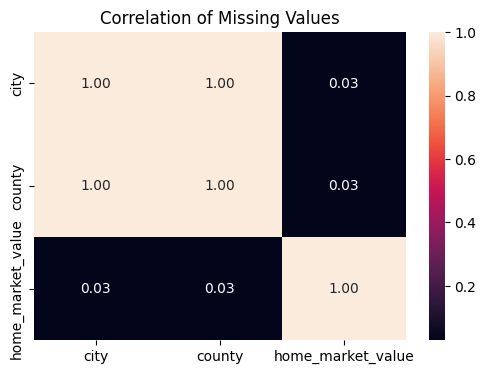

In [11]:
# Create a missing values indicator DataFrame
missing_df = df[['city','county','home_market_value']].isnull().astype(int)

# Compute the correlation matrix
corr_matrix = missing_df.corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation of Missing Values')
plt.show()


<Axes: >

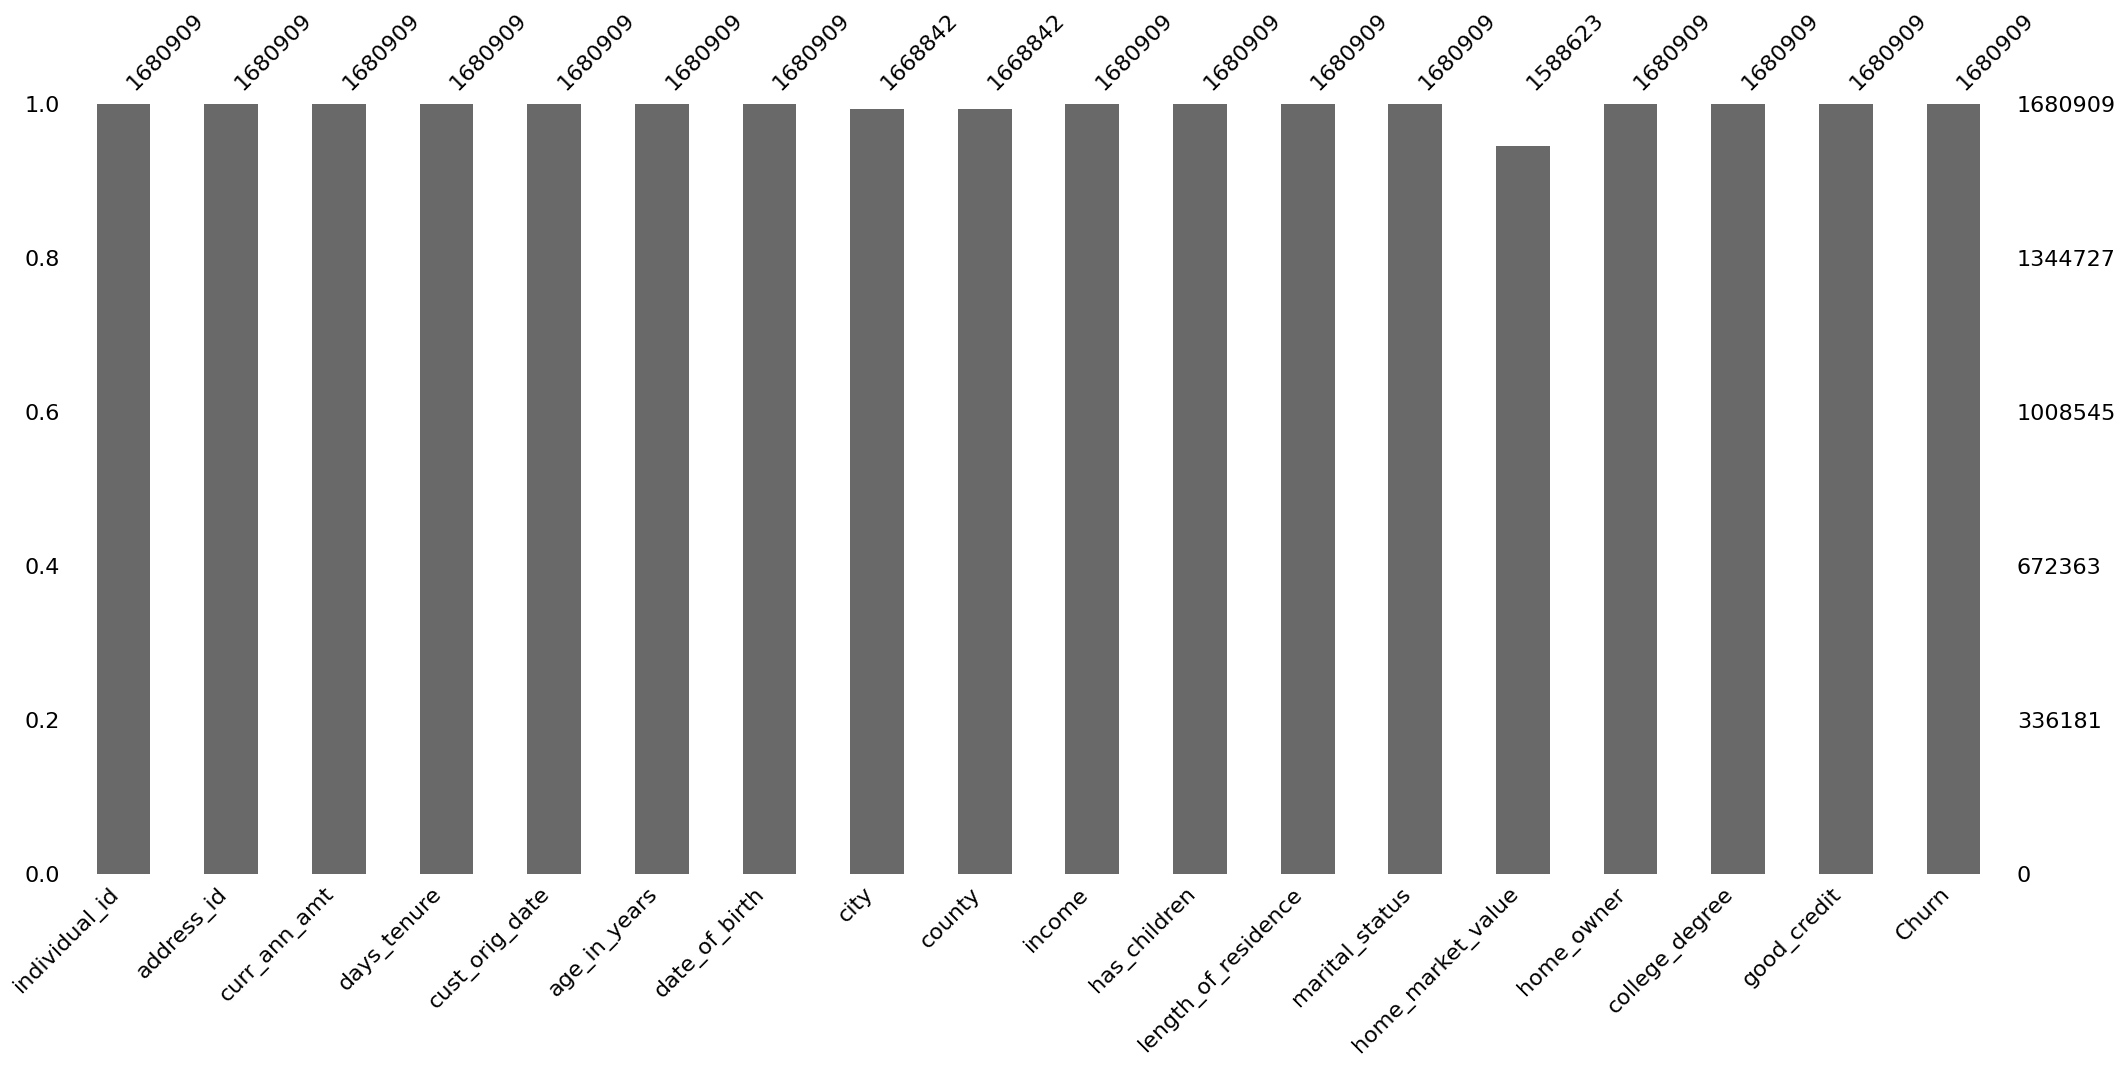

In [12]:
import missingno as msno
msno.bar(df)  # Visualize missing values

In [13]:
df.dropna(subset = ['city','county'],inplace=True)
df.isnull().sum()

individual_id              0
address_id                 0
curr_ann_amt               0
days_tenure                0
cust_orig_date             0
age_in_years               0
date_of_birth              0
city                       0
county                     0
income                     0
has_children               0
length_of_residence        0
marital_status             0
home_market_value      90691
home_owner                 0
college_degree             0
good_credit                0
Churn                      0
dtype: int64

In [14]:
df['home_market_value'].fillna('0 - 0', inplace=True)
df[['min_home_mrkt_value', 'max_home_mrkt_value']] = df['home_market_value'].str.split(' - ', expand=True)
df['min_home_mrkt_value'] = pd.to_numeric(df['min_home_mrkt_value'], errors='coerce')
df['max_home_mrkt_value'] = pd.to_numeric(df['max_home_mrkt_value'], errors='coerce')
df['home_market_value'] = (df['min_home_mrkt_value'] + df['max_home_mrkt_value']) / 2

df.drop(columns=['min_home_mrkt_value', 'max_home_mrkt_value'], inplace=True)
df.head()

C:\Users\Vincent-Isaac\AppData\Local\Temp\ipykernel_4720\1354054313.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['home_market_value'].fillna('0 - 0', inplace=True)


,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,city,county,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn
0,2.213000e+11,5.213000e+11,818.877997,1454.0,2018-12-09,44,1978-06-23,Kaufman,Kaufman,22500.0,1.0,15.0,Married,62499.5,1.0,1.0,1.0,0
1,2.213001e+11,5.213001e+11,974.199182,1795.0,2018-01-02,72,1950-05-30,Grand Prairie,Dallas,27500.0,0.0,2.0,Single,62499.5,1.0,0.0,0.0,0
2,2.213007e+11,5.213002e+11,967.375112,4818.0,2009-09-23,55,1967-07-07,Dallas,Dallas,42500.0,0.0,10.0,Married,87499.5,1.0,0.0,0.0,0
3,2.213016e+11,5.213006e+11,992.409561,130.0,2022-07-25,53,1969-05-25,Arlington,Tarrant,125000.0,1.0,6.0,Married,187499.5,1.0,0.0,1.0,1
4,2.213016e+11,5.213006e+11,784.633494,5896.0,2006-10-11,50,1972-09-25,Fort Worth,Tarrant,87500.0,1.0,4.0,Married,237499.5,1.0,1.0,1.0,0


In [15]:
df.describe()

,individual_id,address_id,curr_ann_amt,days_tenure,age_in_years,income,has_children,length_of_residence,home_market_value,home_owner,college_degree,good_credit,Churn
count,1.668842e+06,1.668842e+06,1.668842e+06,1.668842e+06,1.668842e+06,1.668842e+06,1.668842e+06,1.668842e+06,1.667068e+06,1.668842e+06,1.668842e+06,1.668842e+06,1.668842e+06
mean,2.213018e+11,5.213007e+11,9.406119e+02,3.601088e+03,5.580616e+01,8.181144e+04,5.229572e-01,7.509954e+00,1.237967e+05,8.217638e-01,3.519279e-01,8.451154e-01,1.150516e-01
std,9.893854e+05,4.146046e+05,2.466014e+02,2.340914e+03,1.455719e+01,5.435385e+04,4.994728e-01,5.133131e+00,8.768767e+04,3.827115e-01,4.775718e-01,3.617948e-01,3.190843e-01
min,2.213000e+11,5.213000e+11,-1.943131e+02,2.000000e+01,2.300000e+01,5.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.213009e+11,5.213003e+11,7.723440e+02,1.397000e+03,4.500000e+01,4.750000e+04,0.000000e+00,3.000000e+00,6.249950e+04,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
50%,2.213018e+11,5.213007e+11,9.353243e+02,3.649000e+03,5.500000e+01,7.000000e+04,1.000000e+00,6.801000e+00,1.124995e+05,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
75%,2.213027e+11,5.213010e+11,1.103362e+03,6.291000e+03,6.400000e+01,8.750000e+04,1.000000e+00,1.300000e+01,1.624995e+05,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
max,2.213033e+11,5.213015e+11,2.269374e+03,6.291000e+03,1.140000e+02,2.500000e+05,1.000000e+00,1.500000e+01,8.749995e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [16]:
print(f"States present: {states}")

print("Minimum home market value:", df['home_market_value'].min())
print("Maximum home market value:", df['home_market_value'].max())
print("Mean home market value:", df['home_market_value'].mean())
print("Median home market value:", df['home_market_value'].median())
print(df['home_market_value'].mean() -  df['home_market_value'].median() )

States present: ['TX']
Minimum home market value: 0.0
Maximum home market value: 874999.5
Mean home market value: 123796.73433327254
Median home market value: 112499.5
11297.234333272543


Here, mean ≈ 117,263 and median = 100,000 for home_market_value → Right skewed.

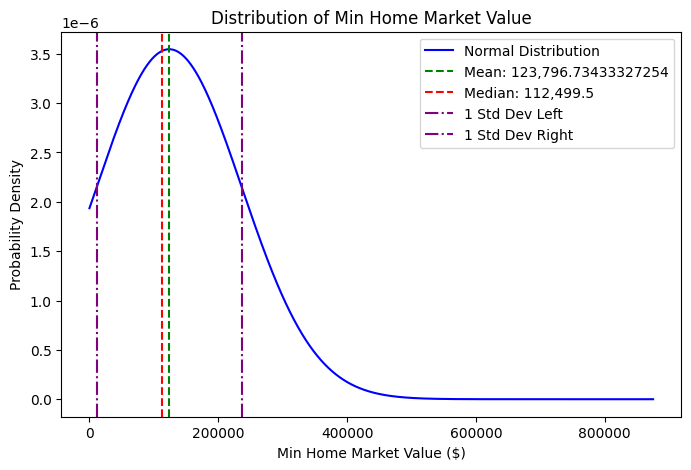

In [17]:
min_value = df['home_market_value'].min()
max_value = df['home_market_value'].max()
mean_value = df['home_market_value'].mean()
median_value = df['home_market_value'].median()
std_dev = df['home_market_value'].median()
count =len(df['home_market_value'])
# Generate x values from min to max for min_home_mrkt_value
x_values = np.linspace(min_value, max_value, count)
# Generate normal distribution using mean and standard deviation
y_values = norm.pdf(x_values, mean_value, std_dev)

# Plot the normal distribution for min_home_mrkt_value
plt.figure(figsize=(8, 5))

plt.plot(x_values, y_values, color='blue', label="Normal Distribution")
plt.axvline(x=mean_value, color='green', linestyle='--', label=f"Mean: {mean_value:,}")
plt.axvline(x=median_value, color='red', linestyle='--', label=f"Median: {median_value:,}")
plt.axvline(x=mean_value - std_dev, color='purple', linestyle='-.', label="1 Std Dev Left")
plt.axvline(x=mean_value + std_dev, color='purple', linestyle='-.', label="1 Std Dev Right")
plt.title("Distribution of Min Home Market Value")
plt.xlabel("Min Home Market Value ($)")
plt.ylabel("Probability Density")
plt.legend()

In [18]:
df['home_market_value'] = df['home_market_value'].fillna(df['home_market_value'].median())
df.isnull().sum()

individual_id          0
address_id             0
curr_ann_amt           0
days_tenure            0
cust_orig_date         0
age_in_years           0
date_of_birth          0
city                   0
county                 0
income                 0
has_children           0
length_of_residence    0
marital_status         0
home_market_value      0
home_owner             0
college_degree         0
good_credit            0
Churn                  0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1668842 entries, 0 to 1680908
Data columns (total 18 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   individual_id        1668842 non-null  float64
 1   address_id           1668842 non-null  float64
 2   curr_ann_amt         1668842 non-null  float64
 3   days_tenure          1668842 non-null  float64
 4   cust_orig_date       1668842 non-null  object 
 5   age_in_years         1668842 non-null  int64  
 6   date_of_birth        1668842 non-null  object 
 7   city                 1668842 non-null  object 
 8   county               1668842 non-null  object 
 9   income               1668842 non-null  float64
 10  has_children         1668842 non-null  float64
 11  length_of_residence  1668842 non-null  float64
 12  marital_status       1668842 non-null  object 
 13  home_market_value    1668842 non-null  float64
 14  home_owner           1668842 non-null  float64
 15  col

In [20]:
counties = df['county'].unique()
cities = df['city'].unique()
status = df['marital_status'].unique()

print(f"Counties: {counties}\n")
print(f"Cities: {cities}\n")
print(f"Martial Status: {status}\n")

Counties: ['Kaufman' 'Dallas' 'Tarrant' 'Denton' 'Collin' 'Parker' 'Ellis' 'Navarro'
 'Hunt' 'Johnson' 'Rockwall' 'Cooke' 'Grayson' 'Hill']

Cities: ['Kaufman' 'Grand Prairie' 'Dallas' 'Arlington' 'Fort Worth' 'Carrollton'
 'Allen' 'Bedford' 'The Colony' 'Mckinney' 'Irving' 'Mesquite' 'Hurst'
 'Garland' 'Sachse' 'Euless' 'Plano' 'Frisco' 'Grapevine' 'Cedar Hill'
 'Keller' 'Justin' 'Wylie' 'Aledo' 'Waxahachie' 'Seagoville'
 'North Richland Hills' 'Desoto' 'Roanoke' 'Southlake' 'Lancaster' 'Kemp'
 'Mansfield' 'Richardson' 'Rice' 'Caddo Mills' 'Red Oak' 'Weatherford'
 'Flower Mound' 'Denton' 'Ennis' 'Midlothian' 'Coppell' 'Sanger' 'Aubrey'
 'Burleson' 'Duncanville' 'Crowley' 'Rockwall' 'Rowlett' 'Colleyville'
 'Lewisville' 'Balch Springs' 'Argyle' 'Lake Dallas' 'Haslet' 'Terrell'
 'Forney' 'Haltom City' 'Azle' 'Addison' 'Italy' 'Springtown' 'Joshua'
 'Princeton' 'Anna' 'Little Elm' 'Crandall' 'Ponder' 'Royse City'
 'Valley View' 'Ferris' 'Scurry' 'Farmersville' 'Prosper' 'Kennedale'
 'Lav

In [21]:
from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()

df['county'] = df['county'].map(df['county'].value_counts(normalize=True))
df['city'] = df['city'].map(df['city'].value_counts(normalize=True))

df['cust_orig_date'] = pd.to_datetime(df['cust_orig_date'])
df['cust_org_age'] = (pd.Timestamp.today() - df['cust_orig_date']).dt.days // 365


df['date_of_birth'] = pd.to_datetime(df['date_of_birth'])
df['age_in_years'] = (pd.Timestamp.today() - df['date_of_birth']).dt.days // 365

df['marital_status'] = encoder.fit_transform(df[['marital_status']])

In [22]:
df.head()

,individual_id,address_id,curr_ann_amt,days_tenure,cust_orig_date,age_in_years,date_of_birth,city,county,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn,cust_org_age
0,2.213000e+11,5.213000e+11,818.877997,1454.0,2018-12-09,46,1978-06-23,0.003336,0.018956,22500.0,1.0,15.0,0.0,62499.5,1.0,1.0,1.0,0,6
1,2.213001e+11,5.213001e+11,974.199182,1795.0,2018-01-02,74,1950-05-30,0.025644,0.373900,27500.0,0.0,2.0,1.0,62499.5,1.0,0.0,0.0,0,7
2,2.213007e+11,5.213002e+11,967.375112,4818.0,2009-09-23,57,1967-07-07,0.183324,0.373900,42500.0,0.0,10.0,0.0,87499.5,1.0,0.0,0.0,0,15
3,2.213016e+11,5.213006e+11,992.409561,130.0,2022-07-25,55,1969-05-25,0.059195,0.291680,125000.0,1.0,6.0,0.0,187499.5,1.0,0.0,1.0,1,2
4,2.213016e+11,5.213006e+11,784.633494,5896.0,2006-10-11,52,1972-09-25,0.131500,0.291680,87500.0,1.0,4.0,0.0,237499.5,1.0,1.0,1.0,0,18


In [23]:
drop_columns = ['cust_orig_date','date_of_birth']
df.drop(columns=drop_columns,inplace=True)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1668842 entries, 0 to 1680908
Data columns (total 17 columns):
 #   Column               Non-Null Count    Dtype  
---  ------               --------------    -----  
 0   individual_id        1668842 non-null  float64
 1   address_id           1668842 non-null  float64
 2   curr_ann_amt         1668842 non-null  float64
 3   days_tenure          1668842 non-null  float64
 4   age_in_years         1668842 non-null  int64  
 5   city                 1668842 non-null  float64
 6   county               1668842 non-null  float64
 7   income               1668842 non-null  float64
 8   has_children         1668842 non-null  float64
 9   length_of_residence  1668842 non-null  float64
 10  marital_status       1668842 non-null  float64
 11  home_market_value    1668842 non-null  float64
 12  home_owner           1668842 non-null  float64
 13  college_degree       1668842 non-null  float64
 14  good_credit          1668842 non-null  float64
 15  Chu

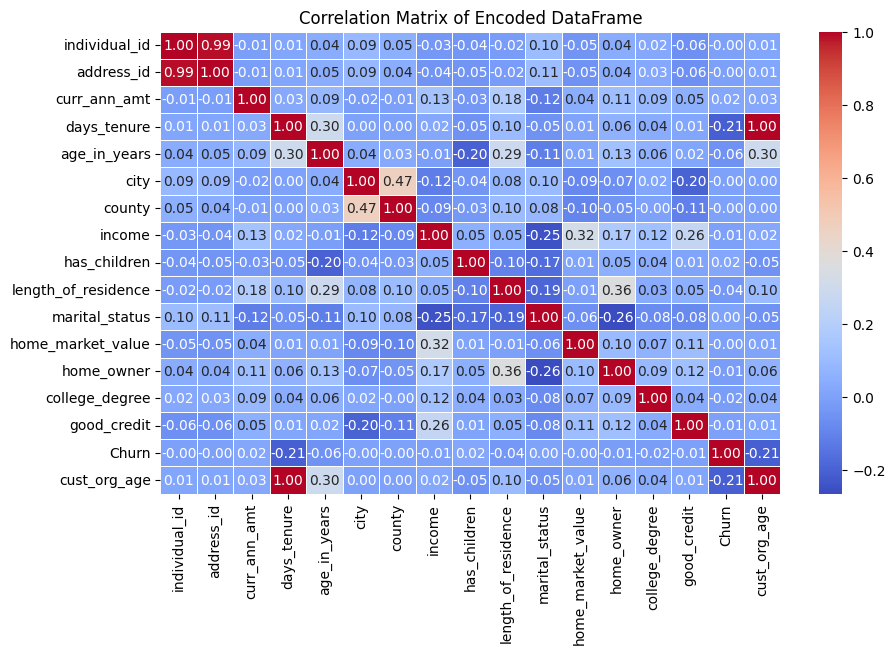

In [25]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Encoded DataFrame")
plt.show()

In [26]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
print(vif_data)

                Feature         VIF
0         individual_id    1.514641
1            address_id    0.047934
2          curr_ann_amt    1.063868
3           days_tenure  785.059639
4          age_in_years    1.247292
5                  city    1.335362
6                county    1.295551
7                income    1.273670
8          has_children    1.100699
9   length_of_residence    1.307795
10       marital_status    1.211192
11    home_market_value    1.125622
12           home_owner    1.256979
13       college_degree    1.034202
14          good_credit    1.112995
15                Churn    1.047826
16         cust_org_age  784.276910


In [27]:
df.drop(columns=['address_id','cust_org_age'],inplace=True)
df.head()

,individual_id,curr_ann_amt,days_tenure,age_in_years,city,county,income,has_children,length_of_residence,marital_status,home_market_value,home_owner,college_degree,good_credit,Churn
0,2.213000e+11,818.877997,1454.0,46,0.003336,0.018956,22500.0,1.0,15.0,0.0,62499.5,1.0,1.0,1.0,0
1,2.213001e+11,974.199182,1795.0,74,0.025644,0.373900,27500.0,0.0,2.0,1.0,62499.5,1.0,0.0,0.0,0
2,2.213007e+11,967.375112,4818.0,57,0.183324,0.373900,42500.0,0.0,10.0,0.0,87499.5,1.0,0.0,0.0,0
3,2.213016e+11,992.409561,130.0,55,0.059195,0.291680,125000.0,1.0,6.0,0.0,187499.5,1.0,0.0,1.0,1
4,2.213016e+11,784.633494,5896.0,52,0.131500,0.291680,87500.0,1.0,4.0,0.0,237499.5,1.0,1.0,1.0,0


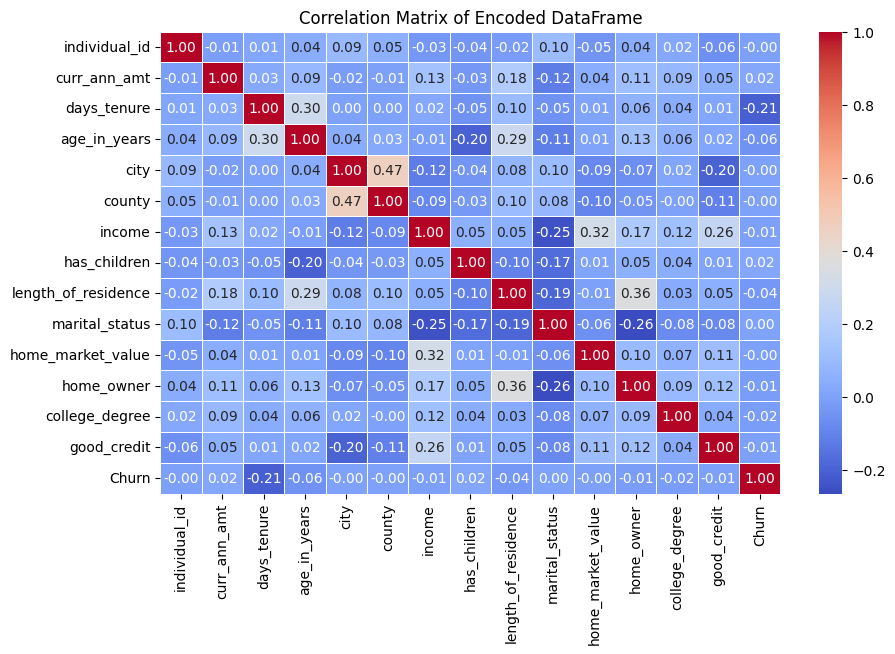

In [28]:
corr_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Encoded DataFrame")
plt.show()

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif_data = pd.DataFrame()
vif_data["Feature"] = df.columns
vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
print(vif_data)

                Feature        VIF
0         individual_id  51.313873
1          curr_ann_amt   1.063751
2           days_tenure   1.145470
3          age_in_years   1.241697
4                  city   1.328580
5                county   1.295547
6                income   1.273482
7          has_children   1.100196
8   length_of_residence   1.304693
9        marital_status   1.199953
10    home_market_value   1.123866
11           home_owner   1.248976
12       college_degree   1.033547
13          good_credit   1.111171
14                Churn   1.047117


In [30]:
df['Churn'].value_counts()

Churn
0    1476839
1     192003
Name: count, dtype: int64

In [31]:
X = df.drop(columns=['Churn'])
X = X.values

y = df['Churn']

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X)

In [33]:
logit = sml.Logit(y, X_Scaled).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.683939
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:              1668842
Model:                          Logit   Df Residuals:                  1668828
Method:                           MLE   Df Model:                           13
Date:                Tue, 11 Mar 2025   Pseudo R-squ.:                 -0.9161
Time:                        05:03:08   Log-Likelihood:            -1.1414e+06
converged:                       True   LL-Null:                   -5.9569e+05
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0007      0.002     -0.470      0.638      -0.004       0.002
x2             0.0368      0.

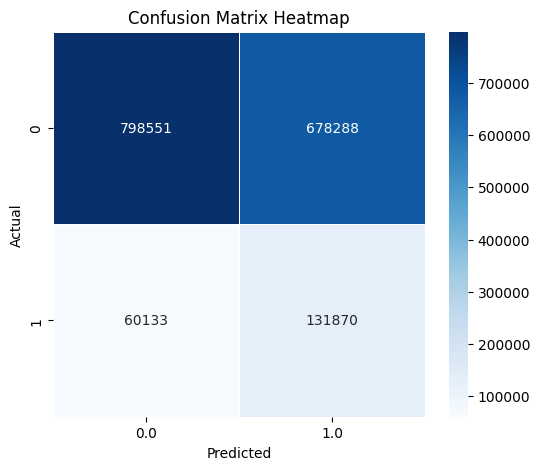

In [34]:
confusion_matrix = pd.crosstab(y, np.round(logit.predict(),0), rownames=['Actual'], colnames=['Predicted'])

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title("Confusion Matrix Heatmap")
plt.show()


In [35]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_Scaled, y)

In [36]:
y_resampled.value_counts()

Churn
0    1476839
1    1476839
Name: count, dtype: int64

In [37]:
logit = sml.Logit(y_resampled, X_resampled).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.645332
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:              2953678
Model:                          Logit   Df Residuals:                  2953664
Method:                           MLE   Df Model:                           13
Date:                Tue, 11 Mar 2025   Pseudo R-squ.:                 0.06898
Time:                        05:07:22   Log-Likelihood:            -1.9061e+06
converged:                       True   LL-Null:                   -2.0473e+06
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0013      0.001      1.025      0.305      -0.001       0.004
x2             0.0724      0.

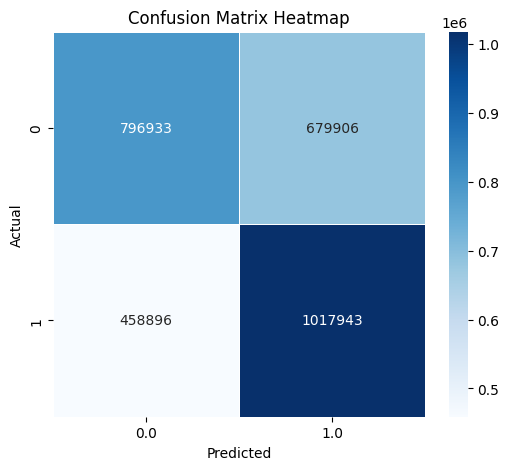

In [38]:
confusion_matrix = pd.crosstab(y_resampled, np.round(logit.predict(),0), rownames=['Actual'], colnames=['Predicted'])

# Plot heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', linewidths=0.5)
plt.title("Confusion Matrix Heatmap")
plt.show()

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_resampled, np.round(logit.predict(),0)))

              precision    recall  f1-score   support

           0       0.63      0.54      0.58   1476839
           1       0.60      0.69      0.64   1476839

    accuracy                           0.61   2953678
   macro avg       0.62      0.61      0.61   2953678
weighted avg       0.62      0.61      0.61   2953678

